# Homework 4 - Week 4

### Question 9.1

***Using the same crime data set uscrime.txt as in Question 8.2, apply Principal Component Analysis and then create a regression model using the first few principal components. Specify your new model in terms of the original variables (not the principal components), and compare its quality to that of your solution to Question 8.2. You can use the R function prcomp for PCA. (Note that to first scale the data, you can include scale. = TRUE to scale as part of the PCA function. Don’t forget that, to make a prediction for the new city, you’ll need to unscale the coefficients (i.e., do the scaling calculation in reverse)!)***

In [2]:
library(dplyr)

In [6]:
# install.packages("DAAG")
library(DAAG)

In [11]:
dat <- read.table("uscrime.txt", header = TRUE)

In [13]:
head(dat)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


In [14]:
str(dat)

'data.frame':	47 obs. of  16 variables:
 $ M     : num  15.1 14.3 14.2 13.6 14.1 12.1 12.7 13.1 15.7 14 ...
 $ So    : int  1 0 1 0 0 0 1 1 1 0 ...
 $ Ed    : num  9.1 11.3 8.9 12.1 12.1 11 11.1 10.9 9 11.8 ...
 $ Po1   : num  5.8 10.3 4.5 14.9 10.9 11.8 8.2 11.5 6.5 7.1 ...
 $ Po2   : num  5.6 9.5 4.4 14.1 10.1 11.5 7.9 10.9 6.2 6.8 ...
 $ LF    : num  0.51 0.583 0.533 0.577 0.591 0.547 0.519 0.542 0.553 0.632 ...
 $ M.F   : num  95 101.2 96.9 99.4 98.5 ...
 $ Pop   : int  33 13 18 157 18 25 4 50 39 7 ...
 $ NW    : num  30.1 10.2 21.9 8 3 4.4 13.9 17.9 28.6 1.5 ...
 $ U1    : num  0.108 0.096 0.094 0.102 0.091 0.084 0.097 0.079 0.081 0.1 ...
 $ U2    : num  4.1 3.6 3.3 3.9 2 2.9 3.8 3.5 2.8 2.4 ...
 $ Wealth: int  3940 5570 3180 6730 5780 6890 6200 4720 4210 5260 ...
 $ Ineq  : num  26.1 19.4 25 16.7 17.4 12.6 16.8 20.6 23.9 17.4 ...
 $ Prob  : num  0.0846 0.0296 0.0834 0.0158 0.0414 ...
 $ Time  : num  26.2 25.3 24.3 29.9 21.3 ...
 $ Crime : int  791 1635 578 1969 1234 682 963 1555 

We call prcomp() to do PCA on the data.

The goal is to draw a graph that shows how the samples are related (or not related) to each other.

In [15]:
my.prc <- prcomp(dat[,-16], center=TRUE, scale=TRUE)

In [16]:
summary(my.prc)

Importance of components:
                          PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.4534 1.6739 1.4160 1.07806 0.97893 0.74377 0.56729
Proportion of Variance 0.4013 0.1868 0.1337 0.07748 0.06389 0.03688 0.02145
Cumulative Proportion  0.4013 0.5880 0.7217 0.79920 0.86308 0.89996 0.92142
                           PC8     PC9    PC10    PC11    PC12    PC13   PC14
Standard deviation     0.55444 0.48493 0.44708 0.41915 0.35804 0.26333 0.2418
Proportion of Variance 0.02049 0.01568 0.01333 0.01171 0.00855 0.00462 0.0039
Cumulative Proportion  0.94191 0.95759 0.97091 0.98263 0.99117 0.99579 0.9997
                          PC15
Standard deviation     0.06793
Proportion of Variance 0.00031
Cumulative Proportion  1.00000

In [17]:
my.prc$x

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
-4.1992835,-1.09383120,-1.11907395,0.67178115,0.055283376,0.30733835,-0.566408161,-0.007801727,0.223509947,0.452743650,-0.0847454174,0.22096639,-0.112616798,0.326964861,0.0233840087
1.1726630,0.67701360,-0.05244634,-0.08350709,-1.173199821,-0.58323731,0.195611187,0.154566472,0.436777195,0.212085890,-0.0339166059,0.35686524,0.297516509,0.252356741,-0.0607636781
-4.1737248,0.27677501,-0.37107658,0.37793995,0.541345246,0.71872230,0.103306929,0.351138883,0.062992321,-0.067190215,-0.4814915573,-0.04701948,0.052160542,-0.486551130,0.0421174952
3.8349617,-2.57690596,0.22793998,0.38262331,-1.644746496,0.72948841,0.266994985,-1.547460841,-0.379541806,0.229223052,0.1098495110,0.17727101,0.088381306,0.149678420,0.0291749700
1.8392999,1.33098564,1.27882805,0.71814305,0.041590320,-0.39409015,0.070507664,-0.543237437,0.224632448,0.477690842,-0.3295818584,0.41807551,-0.722152235,0.131027187,-0.0751493967
2.9072336,-0.33054213,0.53288181,1.22140635,1.374360960,-0.69225131,0.226482092,0.562323186,0.417722172,0.091009390,0.0102296864,-0.70661980,-0.135172709,0.194925675,0.0155861048
0.2457752,-0.07362562,-0.90742064,1.13685873,0.718644387,-0.93107472,0.307507661,1.056861503,-1.160218292,0.791683164,0.2829470570,-0.65196573,0.168327740,0.145473719,-0.0654492790
-0.1301330,-1.35985577,0.59753132,1.44045387,-0.222781388,0.04912052,0.911404993,0.693339330,-0.421314146,0.613278523,-0.3211719754,0.49089082,0.218057687,-0.623230400,-0.0259344691
-3.6103169,-0.68621008,1.28372246,0.55171150,-0.324292990,0.12683417,-0.417420968,-0.053270500,0.232662026,0.065541569,0.1212937342,-0.29249322,-0.242429444,0.026476592,0.0252300906
1.1672376,3.03207033,0.37984502,-0.28887026,-0.646056610,0.33130781,0.009579488,-0.329270845,-0.123629746,0.200126861,-0.0005664179,-0.21063943,-0.257769674,-0.276967642,0.0232404560


In [18]:
my.prc$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
M,-0.30371194,0.06280357,0.1724199946,-0.02035537,-0.35832737,-0.449132706,-0.15707378,-0.55367691,0.15474793,-0.01443093,0.39446657,0.16580189,-0.05142365,0.04901705,0.0051398012
So,-0.33088129,-0.15837219,0.0155433104,0.29247181,-0.12061130,-0.100500743,0.19649727,0.22734157,-0.65599872,0.06141452,0.23397868,-0.05753357,-0.29368483,-0.29364512,0.0084369230
Ed,0.33962148,0.21461152,0.0677396249,0.07974375,-0.02442839,-0.008571367,-0.23943629,-0.14644678,-0.44326978,0.51887452,-0.11821954,0.47786536,0.19441949,0.03964277,-0.0280052040
Po1,0.30863412,-0.26981761,0.0506458161,0.33325059,-0.23527680,-0.095776709,0.08011735,0.04613156,0.19425472,-0.14320978,-0.13042001,0.22611207,-0.18592255,-0.09490151,-0.6894155129
Po2,0.31099285,-0.26396300,0.0530651173,0.35192809,-0.20473383,-0.119524780,0.09518288,0.03168720,0.19512072,-0.05929780,-0.13885912,0.19088461,-0.13454940,-0.08259642,0.7200270100
LF,0.17617757,0.31943042,0.2715301768,-0.14326529,-0.39407588,0.504234275,-0.15931612,0.25513777,0.14393498,0.03077073,0.38532827,0.02705134,-0.27742957,-0.15385625,0.0336823193
M.F,0.11638221,0.39434428,-0.2031621598,0.01048029,-0.57877443,-0.074501901,0.15548197,-0.05507254,-0.24378252,-0.35323357,-0.28029732,-0.23925913,0.31624667,-0.04125321,0.0097922075
Pop,0.11307836,-0.46723456,0.0770210971,-0.03210513,-0.08317034,0.547098563,0.09046187,-0.59078221,-0.20244830,-0.03970718,0.05849643,-0.18350385,0.12651689,-0.05326383,0.0001496323
NW,-0.29358647,-0.22801119,0.0788156621,0.23925971,-0.36079387,0.051219538,-0.31154195,0.20432828,0.18984178,0.49201966,-0.20695666,-0.36671707,0.22901695,0.13227774,-0.0370783671
U1,0.04050137,0.00807439,-0.6590290980,-0.18279096,-0.13136873,0.017385981,-0.17354115,-0.20206312,0.02069349,0.22765278,-0.17857891,-0.09314897,-0.59039450,-0.02335942,0.0111359325


### rotation matrix is a formula that converts from the original variables to Principal Components


**So PC1 is nothing but (-0.30371194 * M) + (-0.33088129 * SO) + (0.33962148 * Ed) + ............ + (-0.02062867 * Time), similarly it goes for other PC's**

In [24]:
# We use **sdev** to calculate the variation in the original data each PC accounts for

var <- my.prc$sdev^2

In [25]:
var

[1] 6.018952657 2.801847026 2.004944334 1.162207801 0.958298972 0.553193900
 [7] 0.321818687 0.307401270 0.235155292 0.199880931 0.175685403 0.128190107
[13] 0.069341691 0.058467765 0.004614165

In [26]:
var.per <- round(var/sum(var)*100, 1) # PERCENTAGE of variation

In [27]:
var.per

[1] 40.1 18.7 13.4  7.7  6.4  3.7  2.1  2.0  1.6  1.3  1.2  0.9  0.5  0.4  0.0

**We can see that the first principal component explains 40.1% variance. Second component explains 18.7% variance. Third component explains 13.4% variance and so on.**

# Selecting number of PCs' according to the following graphs

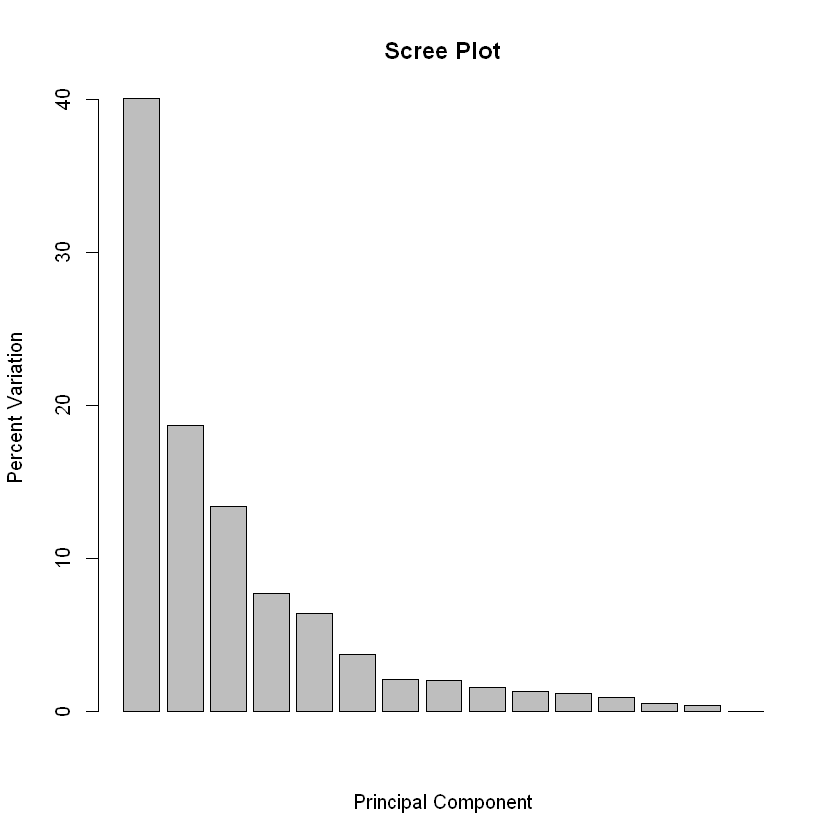

In [36]:
barplot(var.per, main="Scree Plot", xlab="Principal Component", ylab="Percent Variation")

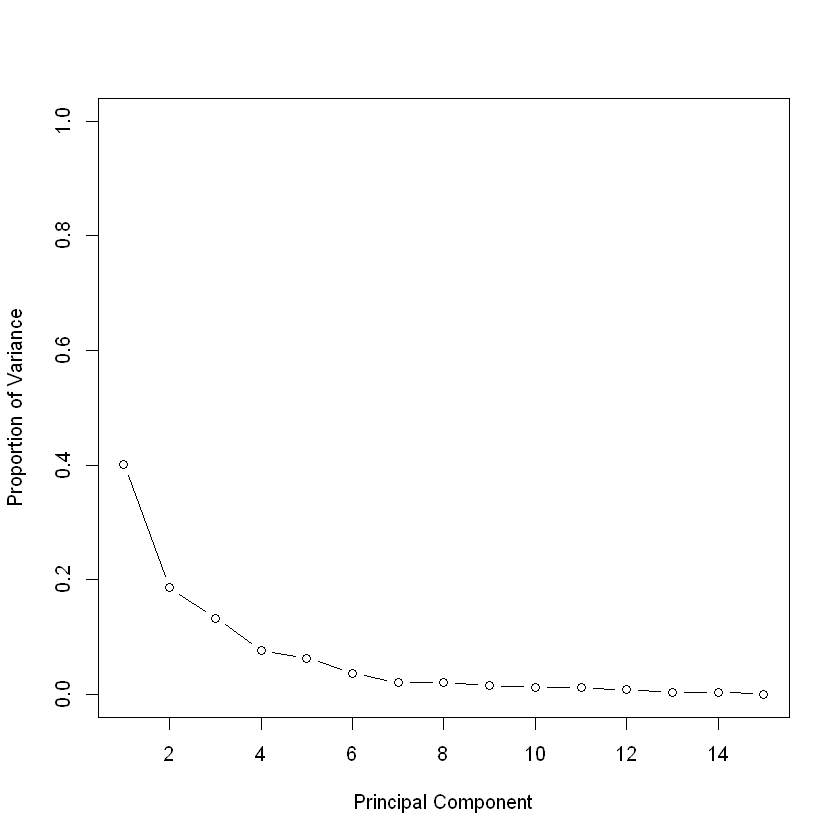

In [38]:
#The summary ranks the proportion of variance of each principal component. #PCs 1-3 have a significant amount of variation 
#relative to the rest. Shown in the plot below. 
#get back eigenvalues, square the standard deviation 
var <- my.prc$sdev^2
#get proportional variance by dividing each eigenvalue by the sum of eigenvalues
propvar <- var/sum(var)
plot(propvar,
     xlab = "Principal Component",
     ylab = "Proportion of Variance",
     ylim = c(0,1) , type= "b")

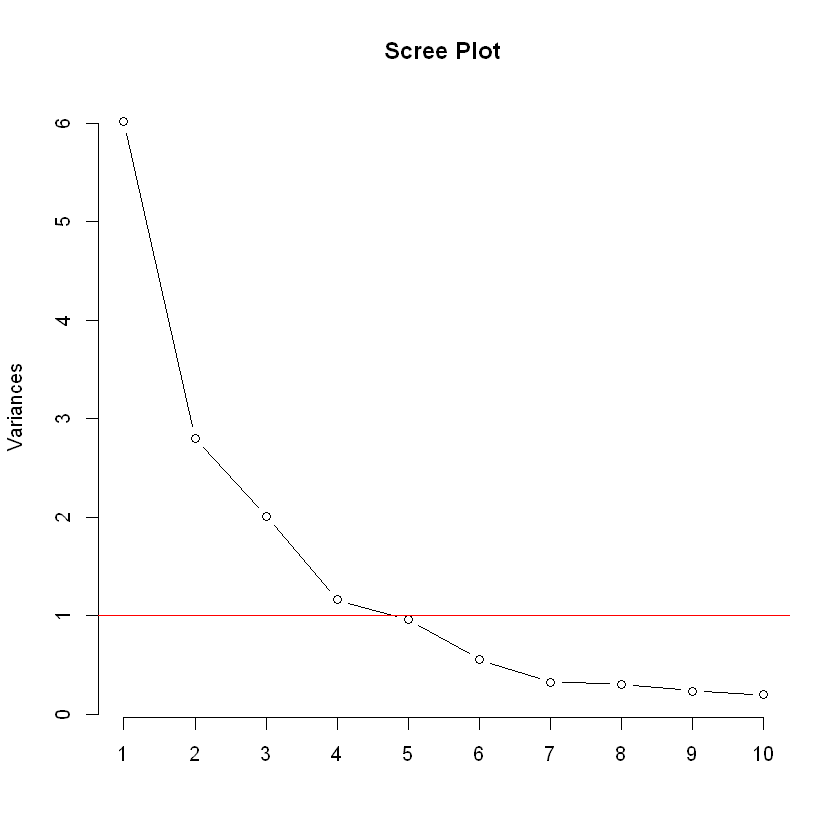

In [31]:
#Determine which PC variables are import. Kaiser method suggests any stdev greater than
#one is important. 
screeplot(my.prc,main = "Scree Plot", type = "line")
abline(h=1, col="red")

### From the above plots; I'm taking the first 5 Principal Components, because they account for a little more than 85% of the variation in data

**based on this technique, we would choose to use the first 5 PCs in our model**

In [47]:
#we now combine PCs 1:k with the crime data from our original data set
PCcrime <- as.data.frame(cbind(my.prc$x[,1:5],dat[,16]))

colnames(PCcrime) <- c("PC1", "PC2", "PC3", "PC4", "PC5","Crime")
PCcrime

PC1,PC2,PC3,PC4,PC5,Crime
-4.1992835,-1.09383120,-1.11907395,0.67178115,0.055283376,791
1.1726630,0.67701360,-0.05244634,-0.08350709,-1.173199821,1635
-4.1737248,0.27677501,-0.37107658,0.37793995,0.541345246,578
3.8349617,-2.57690596,0.22793998,0.38262331,-1.644746496,1969
1.8392999,1.33098564,1.27882805,0.71814305,0.041590320,1234
2.9072336,-0.33054213,0.53288181,1.22140635,1.374360960,682
0.2457752,-0.07362562,-0.90742064,1.13685873,0.718644387,963
-0.1301330,-1.35985577,0.59753132,1.44045387,-0.222781388,1555
-3.6103169,-0.68621008,1.28372246,0.55171150,-0.324292990,856
1.1672376,3.03207033,0.37984502,-0.28887026,-0.646056610,705


In [48]:
#using PCs combined with crime data, we create a linear regression model
#The advantage of doing this is to reduce the complexity of the model
#while also making it more robust
model <- lm(Crime~., data = PCcrime)
summary(model)


Call:
lm(formula = Crime ~ ., data = PCcrime)

Residuals:
    Min      1Q  Median      3Q     Max 
-420.79 -185.01   12.21  146.24  447.86 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   905.09      35.59  25.428  < 2e-16 ***
PC1            65.22      14.67   4.447 6.51e-05 ***
PC2           -70.08      21.49  -3.261  0.00224 ** 
PC3            25.19      25.41   0.992  0.32725    
PC4            69.45      33.37   2.081  0.04374 *  
PC5          -229.04      36.75  -6.232 2.02e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 244 on 41 degrees of freedom
Multiple R-squared:  0.6452,	Adjusted R-squared:  0.6019 
F-statistic: 14.91 on 5 and 41 DF,  p-value: 2.446e-08


In [49]:
#now to do our transformation, we first need our intercept
beta0 <- model$coefficients[1]
beta0

(Intercept) 
   905.0851

In [51]:
#below we pull out our model coefficients, and make the Beta vector
betas <- model$coefficients[2:6]
betas

PC1        PC2        PC3        PC4        PC5 
  65.21593  -70.08312   25.19408   69.44603 -229.04282

**Bringing back the model output to orginal variables**

In [94]:
#now multply the coefficients by our rotated matrix, A to create alpha vector
alpha <- my.prc$rotation[,1:5] %*% betas
t(alpha)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
60.79435,37.84824,19.94776,117.3449,111.4508,76.2549,108.1266,58.88024,98.07179,2.866783,32.34551,35.93336,22.1037,-34.64026,27.20502


### BUT... these coefficients above are using scaled data.
**Now, we have to convert back to the original data.**


**When scaling, this function subtracts the mean and divides by the standard deviation, for each variable.**

**So, alpha * (x - mean)/sd = originalAlpha * x.**

Meaning:

**(1) originalAlpha = alpha/sd**

**(2) we have to modify the constant term a0 by alpha*mean/sd**

In [96]:
#we recover our original alpha values by dividing the alpha vector by sigma
#and our original beta by subtracting from the intercept the sum of (alpha*mu)/sigma
mu <- sapply(dat[,1:15],mean)
# print(paste("Mu:", mu))
sigma <- sapply(dat[,1:15],sd)
# print(paste("Sigma:", sigma))

origAlpha <- alpha/sigma
t(origAlpha)

origBeta0 <- beta0 - sum(alpha*mu /sigma)
print(paste("origBeta0:", origBeta0))

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time
48.37374,79.01922,17.8312,39.48484,39.85892,1886.946,36.69366,1.546583,9.537384,159.0115,38.29933,0.03724014,5.540321,-1523.521,3.838779


[1] "origBeta0: -5933.83744880081"


In [62]:
#estimates now gives us our model Y = aX + b
#where a is our scaled alpha and b is our original intercept
estimates <- as.matrix(dat[,1:15]) %*% origAlpha + origBeta0

In [83]:
estimates

713.6803
1195.7066
506.4008
1744.8151
1004.3223
901.3083
817.7618
1158.0158
862.6600
906.1942
1309.8473


In [85]:
#we can now use our estimates to calculate the R-squared values 
#to observe the accuracy of our model
SSE = sum((estimates - dat[,16])^2)
print(paste("SSE:",SSE))

[1] "SSE: 2441394.04997516"


In [86]:
SStot = sum((dat[,16] - mean(dat[,16]))^2)
print(paste("SStot:",SStot))

[1] "SStot: 6880927.65957447"


In [87]:
R2 <- 1 - SSE/SStot
print(paste("R2:",R2))

[1] "R2: 0.645194053656692"


In [88]:
R2_adjust <- R2 - (1-R2)*5/(nrow(dat)-4)
print(paste("R2_adjust:",R2_adjust))

[1] "R2_adjust: 0.603937548267935"


In [89]:
#now we will use the new_city data given from last week to see what 
#our improved model predicts the crime rate to be
new_city <- data.frame(M= 14.0, So = 0, Ed = 10.0, Po1 = 12.0, Po2 = 15.5,
                    LF = 0.640, M.F = 94.0, Pop = 150, NW = 1.1, U1 = 0.120, U2 = 3.6, Wealth = 3200, 
                       Ineq = 20.1, Prob = 0.040,Time = 39.0)

In [90]:
#first we apply the PCA data onto the new city data so we can apply our model
pred_df <- data.frame(predict(my.prc, new_city))

In [91]:
pred_df

PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
1.224044,-2.767641,0.533605,-1.146837,-1.206098,2.333343,-0.1535916,-1.391625,1.460274,-0.4525158,-0.3466498,1.663782,-1.811307,-2.174071,1.288675


In [76]:
#now predict the Crime rate using Principal components and new city data
pred <- predict(model, pred_df)

In [77]:
pred

1 
1388.926

**This value makes sense relative to the other Crime values**

**Relative to last weeks prediction of 155 and an R-squared of 0.8031, this model seems slightly less sufficient at prescribing values. But this was only a small test to compare, and we observed that with significantly less predictors, a PCA model can deliver nearly the same accuracy.**

### Question 10.1

***Using the same crime data set uscrime.txt as in Questions 8.2 and 9.1, find the best model you can using***

***(a) a regression tree model, and***

***(b) a random forest model.***

***In R, you can use the tree package or the rpart package, and the randomForest package. For each model, describe one or two qualitative takeaways you get from analyzing the results (i.e., don’t just stop when you have a good model, but interpret it too).***

In [98]:
data <- read.table("uscrime.txt", stringsAsFactors = FALSE, header = TRUE)

In [100]:
head(data)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


# Using Regression Tree Model

In [102]:
########## Without splitting data into training and testing sets ##########

# install.packages("tree")
library(tree)

set.seed(1)

In [180]:
# Fit a regression tree function to the crime data

tree.data <- tree(Crime~., data = data)
summary(tree.data)

ERROR: Error in eval(predvars, data, env): object 'Crime' not found


##### Notice that only 4 predictors were used in the construction of this tree

##### More information about the way the tree was split

In [181]:
print(tree.data$frame)

      var  n        dev      yval splits.cutleft splits.cutright
1     Po1 47 6880927.66  905.0851          <7.65           >7.65
2     Pop 23  779243.48  669.6087          <22.5           >22.5
4      LF 12  243811.00  550.5000        <0.5675         >0.5675
8  <leaf>  7   48518.86  466.8571                               
9  <leaf>  5   77757.20  667.6000                               
5  <leaf> 11  179470.73  799.5455                               
3      NW 24 3604162.50 1130.7500          <7.65           >7.65
6     Pop 10  557574.90  886.9000          <21.5           >21.5
12 <leaf>  5  146390.80 1049.2000                               
13 <leaf>  5  147771.20  724.6000                               
7     Po1 14 2027224.93 1304.9286          <9.65           >9.65
14 <leaf>  6  170828.00 1041.0000                               
15 <leaf>  8 1124984.88 1502.8750                               


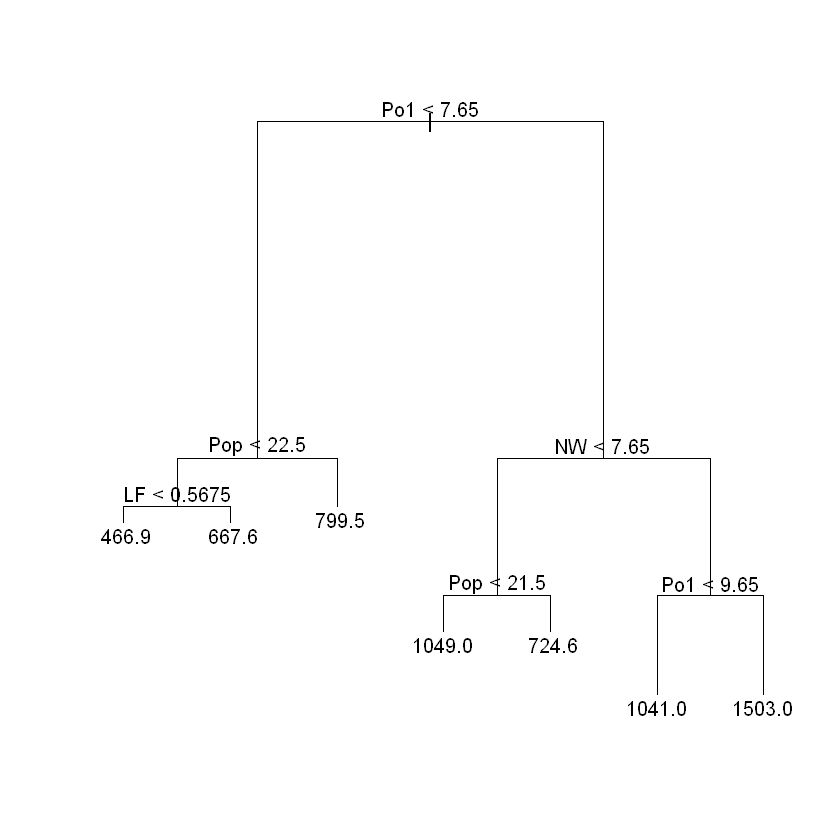

In [107]:
# Plot the regression tree

plot(tree.data)

text(tree.data)

### From the graph:

***We can notice that Pop is used in 2 places. Also, the rightmost brach of the tree, it is also present 2 times once at top and then again at the bottom.***


***The model seems to be overfitted. We can either prune the data or use CV or PCA to handle it.***


***The model shows that Po1 is main factor for branching.***

In [128]:
# Calculate SSres of the unpruned regression model.

yhat <- predict(tree.data)
SSres <- sum((yhat-data$Crime)^2)

In [129]:
SStot <- sum((data$Crime - mean(data$Crime))^2)
R2 <- 1 - SSres/SStot
R2

[1] 0.7244962

The R^2 looks fine for Trees, Next lets look at **Random Forest**

# Using Random Forest Model

In [136]:
data <- read.table("uscrime.txt", stringsAsFactors = FALSE, header = TRUE)

In [137]:
# install.packages("randomForest")
library(randomForest)
set.seed(1)

In [138]:
# Grow the random tree and set the number of predictors that want to consider at each split of the tree

numpred <- 4 # How many variables to split or branch
rf.data <- randomForest(Crime~., data = data, mtry = numpred, importance = TRUE)
rf.data


Call:
 randomForest(formula = Crime ~ ., data = data, mtry = numpred,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 82393.69
                    % Var explained: 43.72

In [139]:
# Calculate SSres of the random forest model

yhat.rf <- predict(rf.data)
SSres <- sum((yhat.rf-data$Crime)^2)

In [140]:
# Calculate SStot and R-squared of this model

SStot <- sum((data$Crime - mean(data$Crime))^2)
R2 <- 1 - SSres/SStot
R2

[1] 0.437212

In [141]:
importance(rf.data)

,%IncMSE,IncNodePurity
M,1.5433378,205277.24
So,2.2457511,21269.39
Ed,3.7399142,264814.17
Po1,11.9531848,1084645.06
Po2,11.0005698,1057598.29
LF,3.2283145,304235.71
M.F,1.5315964,235479.84
Pop,-0.3558573,325124.91
NW,8.7914688,495462.04
U1,-0.3078521,155244.37


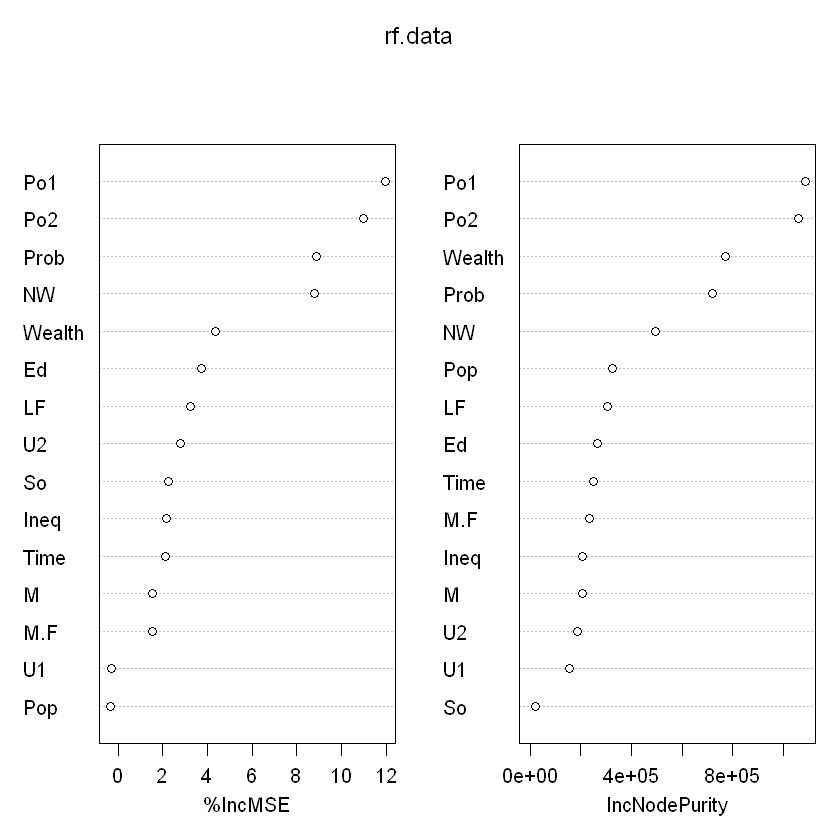

In [143]:
# Plots of these importance measures

varImpPlot(rf.data)

### Po1 was the primary branching variable. So Both of the model thinks that Po1 is the important factor for crime. And, as we saw from regression trees, random forest gives better predictive quality for datapoints where Po1<7.65 than Po1>7.65. But, Random forst have predicted value for Po1>7.65 

### Question 10.2

***Describe a situation or problem from your job, everyday life, current events, etc., for which a logistic
regression model would be appropriate. List some (up to 5) predictors that you might use.***

I have not worked on logistic regression. But as an avid soccer fan, I read multiple articles prior to the 2018 World cup how winner of each match and winner of the overall world cup could be predicted using regression modeling. The predictors used were:
1. average goals scored in 10 matches prior to the current match,
2. rank of each team playing in the match,
3. historic record of the team's result in that country,
4. historic average of number of fans of each team in the event location.
5. team strength

### Question 10.3(a)

***Using the GermanCredit data set germancredit.txt from http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german / (description at http://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29 ), use logistic regression to find a good predictive model for whether credit applicants are good credit risks or not. Show your model (factors used and their coefficients), the software output, and the quality of fit. You can use the glm function in R. To get a logistic regression (logit) model on data where the response is either zero or one, use family=binomial(link=”logit”) in your glm function call.***

In [1]:
data <- read.table("germancredit.txt",sep = " ")

In [2]:
head(data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1


In [3]:
str(data)

'data.frame':	1000 obs. of  21 variables:
 $ V1 : Factor w/ 4 levels "A11","A12","A13",..: 1 2 4 1 1 4 4 2 4 2 ...
 $ V2 : int  6 48 12 42 24 36 24 36 12 30 ...
 $ V3 : Factor w/ 5 levels "A30","A31","A32",..: 5 3 5 3 4 3 3 3 3 5 ...
 $ V4 : Factor w/ 10 levels "A40","A41","A410",..: 5 5 8 4 1 8 4 2 5 1 ...
 $ V5 : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ V6 : Factor w/ 5 levels "A61","A62","A63",..: 5 1 1 1 1 5 3 1 4 1 ...
 $ V7 : Factor w/ 5 levels "A71","A72","A73",..: 5 3 4 4 3 3 5 3 4 1 ...
 $ V8 : int  4 2 2 2 3 2 3 2 2 4 ...
 $ V9 : Factor w/ 4 levels "A91","A92","A93",..: 3 2 3 3 3 3 3 3 1 4 ...
 $ V10: Factor w/ 3 levels "A101","A102",..: 1 1 1 3 1 1 1 1 1 1 ...
 $ V11: int  4 2 3 4 4 4 4 2 4 2 ...
 $ V12: Factor w/ 4 levels "A121","A122",..: 1 1 1 2 4 4 2 3 1 3 ...
 $ V13: int  67 22 49 45 53 35 53 35 61 28 ...
 $ V14: Factor w/ 3 levels "A141","A142",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ V15: Factor w/ 3 levels "A151","A152",..: 2 2 2 3 3 3 2 1 2 2 ...
 $ V16: 

In [4]:
# Since binomial family of glm recognises 0 and 1 as the classfication values, 
# convert 1s and 2s to 0s and 1s for the response variable

data$V21[data$V21==1]<-0
data$V21[data$V21==2]<-1

In [150]:
# Set the seed to produce reproducible results as random sampling is done in the next step

set.seed(1)

In [182]:
# Divide the data into 70% training and 30% test/validation data

m <- nrow(data)
trn <- sample(1:m, size = round(m*0.7), replace = FALSE)
d.train <- data[trn,]
d.valid <- data[-trn,]

In [183]:
# Develop the logistic regression model

reg = glm(V21 ~.,family=binomial(link = "logit"),data=d.train)
summary(reg)


Call:
glm(formula = V21 ~ ., family = binomial(link = "logit"), data = d.train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2662  -0.6349  -0.3339   0.6622   2.6297  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.0514129  1.2663260   0.830  0.40638    
V1A12       -0.6652902  0.2733138  -2.434  0.01493 *  
V1A13       -1.3939036  0.4711475  -2.959  0.00309 ** 
V1A14       -2.2252321  0.3053854  -7.287 3.18e-13 ***
V2           0.0253641  0.0111433   2.276  0.02284 *  
V3A31       -0.1809034  0.6302029  -0.287  0.77407    
V3A32       -0.9597747  0.4917581  -1.952  0.05097 .  
V3A33       -0.8023087  0.5570455  -1.440  0.14978    
V3A34       -1.0727642  0.4969643  -2.159  0.03088 *  
V4A41       -1.9060301  0.4775558  -3.991 6.57e-05 ***
V4A410      -1.4298952  0.8610663  -1.661  0.09679 .  
V4A42       -0.5778509  0.3259400  -1.773  0.07625 .  
V4A43       -0.9798490  0.3094942  -3.166  0.00155 ** 
V4A44        0.14799

In [153]:
y_hat<-predict(reg,d.valid,type = "response")
y_hat

2           10           14           18           21           23 
5.335556e-01 7.185105e-01 3.745099e-01 8.952508e-01 1.015226e-01 6.325092e-02 
          24           26           32           34           38           46 
4.270499e-02 2.196863e-01 5.430291e-01 6.930701e-02 2.234544e-01 2.319356e-01 
          47           50           53           57           59           63 
1.096911e-01 1.375378e-01 8.856708e-02 1.942463e-01 4.119760e-01 5.623590e-01 
          64           68           70           74           75           76 
8.406309e-01 1.896169e-01 1.450622e-01 4.642331e-01 4.867369e-01 1.410796e-01 
          78           88           90           94           95           96 
6.600952e-02 5.450863e-01 6.045528e-01 4.764924e-01 5.314323e-02 9.599810e-01 
          98          106          107          113          114          120 
2.858429e-01 8.534019e-02 6.896444e-01 4.888936e-01 4.999774e-01 1.152610e-01 
         123          125          131          136          142          144 
1.702086e-01 4.859918e-01 4.592919e-01 2.482262e-02 7.920559e-01 4.272501e-01 
         147          149          151          152          154          155 
3.530505e-01 4.833510e-01 8.025534e-02 2.237619e-03 1.739665e-01 3.170181e-01 
         156          157          160          163          165          170 
5.939361e-01 1.657145e-02 9.475754e-03 5.957295e-02 2.030858e-01 2.583956e-01 
         171          172          174          178          186          188 
8.992462e-01 1.481793e-01 2.054178e-02 1.144142e-01 7.697156e-02 4.432877e-02 
         189          191          195          196          199          200 
2.336627e-01 2.161516e-02 4.898498e-01 1.602361e-01 2.579977e-01 5.802506e-01 
         202          204          210          212          221          223 
5.339071e-01 3.310398e-07 4.024923e-04 2.929229e-02 4.243206e-01 1.955449e-01 
         224          227          228          230          231          237 
7.837126e-02 4.815610e-01 5.382337e-01 9.348108e-01 3.676831e-01 1.265293e-01 
         238          239          244          246          249          253 
7.023090e-01 1.028481e-01 1.000617e-01 7.929815e-02 1.463053e-01 9.214179e-01 
         254          255          262          263          269          272 
1.033814e-01 5.870782e-02 3.950045e-01 5.485757e-01 6.951570e-02 4.181873e-02 
         274          275          289          292          297          298 
3.465927e-01 9.007630e-01 1.432779e-01 3.152051e-01 6.225366e-02 1.237206e-02 
         301          314          317          318          319          321 
1.195261e-02 3.556201e-01 2.052074e-01 8.587875e-02 1.310075e-01 6.965822e-01 
         322          323          331          332          337          344 
6.210659e-01 1.788630e-01 1.683751e-01 1.481366e-01 2.386551e-01 2.909454e-01 
         347          351          352          364          366          370 
1.605354e-01 1.214624e-01 3.354175e-02 1.054195e-01 2.462322e-02 2.344282e-01 
         372          373          374          376          379          385 
5.692917e-02 1.300524e-01 3.304940e-01 8.320572e-01 8.347525e-01 1.582455e-01 
         387          388          391          394          398          400 
1.480804e-01 4.075942e-01 9.501074e-02 7.301301e-02 3.087900e-01 2.913382e-02 
         401          405          409          415          416          417 
4.806752e-02 2.940441e-01 1.000996e-01 5.701688e-01 4.347773e-02 7.028507e-01 
         427          429          430          432          438          443 
1.280843e-01 5.149829e-02 3.429136e-01 2.769103e-01 3.897264e-02 1.090670e-01 
         445          447          452          456          458          459 
3.342505e-01 7.982250e-01 8.454491e-02 2.828681e-01 2.545698e-01 6.255400e-01 
         460          461          463          475          486          491 
1.229881e-01 3.438340e-01 5.644765e-01 1.861491e-01 3.059074e-01 9.757818e-02 
         496          497          502          503          

In [156]:
# y_hat is a vector of fractions.
# Now we can use a threshold to make yes/no decisions, and view the confusion matrix.

y_hat_round <- as.integer(y_hat > 0.5)

In [157]:
t <- table(y_hat_round,d.valid$V21)
t

           
y_hat_round   0   1
          0 183  48
          1  25  44

In [158]:
# Model's accuracy is (183 + 43) / (183 + 43 + 22 + 52) = 75%.

acc <- (t[1,1] + t[2,2]) / sum(t)
acc

[1] 0.7566667

In [160]:
# Import the library for developing ROC curve

library(pROC)

In [161]:
# Develop ROC curve to determine the quality of fit

r<-roc(d.valid$V21,y_hat_round)

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = d.valid$V21, predictor = y_hat_round)

Data: y_hat_round in 208 controls (d.valid$V21 0) < 92 cases (d.valid$V21 1).
Area under the curve: 0.679

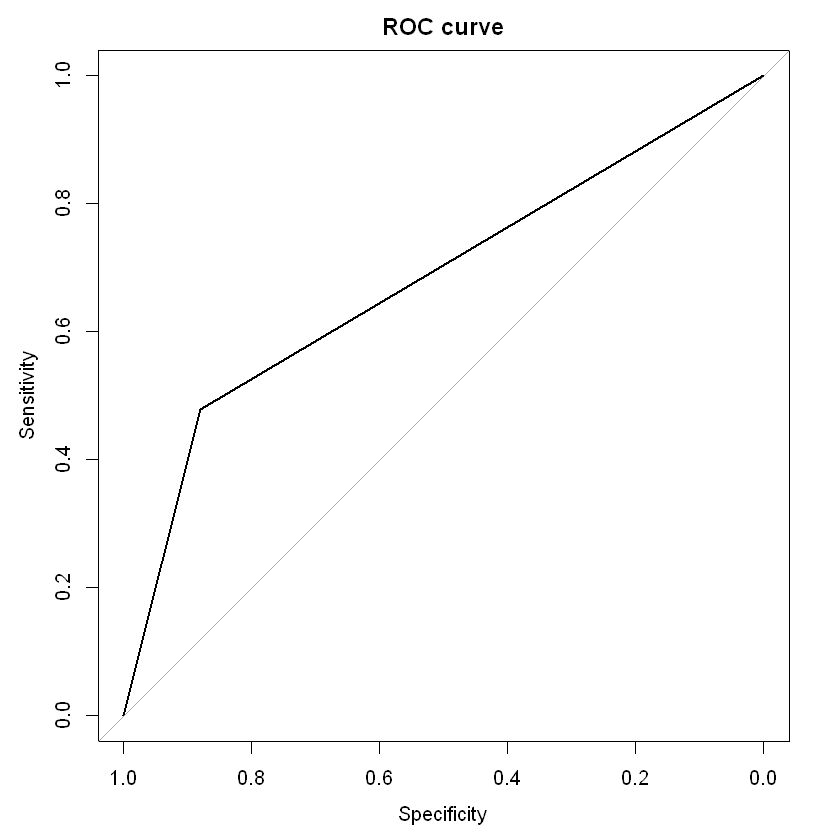

In [162]:
# Plot the ROC curve

plot(r,main="ROC curve")
r

#### AOC is 67.9% for a threshold of 50%, can AOC be better??? I guess I've to adjust the threshold.

### Question 10.3(b)

**2. Because the model gives a result between 0 and 1, it requires setting a threshold probability to separate between “good” and “bad” answers. In this data set, they estimate that incorrectly identifying a bad customer as good, is 5 times worse than incorrectly classifying a good customer as bad. Determine a good threshold probability based on your model.**

In [164]:
# Writting a loop to calculate the loss for the value of thresholds ranging from 0.01 to 1.
# The loss of incorrectly classfying a "bad" customer is 5 times the loss of  incorrectly classifying a "good" customer. 

loss <- c()
for(i in 1:100)
{
  y_hat_round <- as.integer(y_hat > (i/100)) # This is to calculate threshold predictions

  tm <-as.matrix(table(y_hat_round,d.valid$V21))

  if(nrow(tm)>1) { c1 <- tm[2,1] } else { c1 <- 0 }
  if(ncol(tm)>1) { c2 <- tm[1,2] } else { c2 <- 0 }
  loss <- c(loss, c2*5 + c1)
    
}

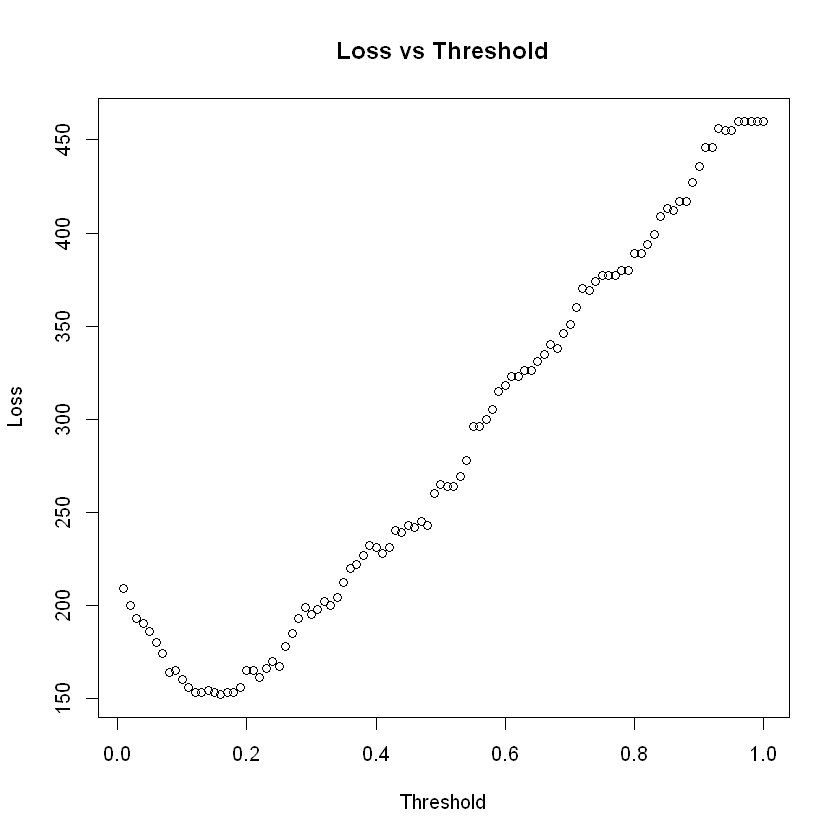

In [165]:
plot(c(1:100)/100,loss,xlab = "Threshold",ylab = "Loss",main = "Loss vs Threshold")

In [167]:
loss

[1] 209 200 193 190 186 180 174 164 165 160 156 153 153 154 153 152 153 153
 [19] 156 165 165 161 166 170 167 178 185 193 199 195 198 202 200 204 212 220
 [37] 222 227 232 231 228 231 240 239 243 242 245 243 260 265 264 264 269 278
 [55] 296 296 300 305 315 318 323 323 326 326 331 335 340 338 346 351 360 370
 [73] 369 374 377 377 377 380 380 389 389 394 399 409 413 412 417 417 427 436
 [91] 446 446 456 455 455 460 460 460 460 460

In [166]:
which.min(loss)

[1] 16

**The threshold probability corresponding to minimum expected loss is 0.16.**

In [168]:
#Here's the accuracy and area-under-curve for the 0.13 threshold:

y_hat_round <- as.integer(y_hat > (which.min(loss)/100)) # find 0/1 predictions
t <- table(y_hat_round,d.valid$V21)
t

           
y_hat_round   0   1
          0 106  10
          1 102  82

In [169]:
acc <- (t[1,1] + t[2,2]) / sum(t)

In [170]:
acc

[1] 0.6266667

In [171]:
r<-roc(d.valid$V21,y_hat_round) 
auc <- r$auc # get AUC

Setting levels: control = 0, case = 1
Setting direction: controls < cases



Call:
roc.default(response = d.valid$V21, predictor = y_hat_round)

Data: y_hat_round in 208 controls (d.valid$V21 0) < 92 cases (d.valid$V21 1).
Area under the curve: 0.7005

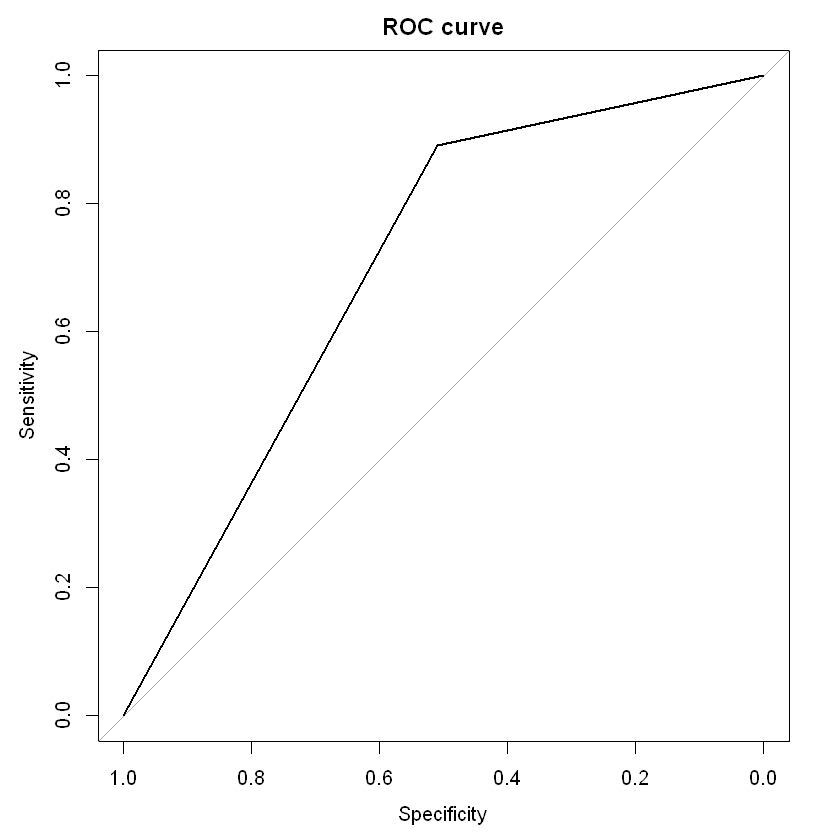

In [173]:
# Plot the ROC curve

plot(r,main="ROC curve")
r

***So keeping the threshold at 0.16 we are getting a AOC of 70%. Which is better than the result that we got before.***